In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SuperNovaMartSales.csv', parse_dates=['Date'])

## Exploratory Data Analysis 🔎

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
data.shape

(1000, 17)

In [6]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [8]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
cat=[]  # List to store categorical column names
num=[]  # List to store numerical column names
# Iterate through each column in the 'data' DataFrame
for column in data.columns: 
 # Check if the number of unique values in the column is greater than 10
    if data[column].nunique() > 10:
# If the condition is met, the column is considered numerical
        num.append(column)
# If the condition is not met, the column is considered categorical
    else:
        cat.append(column)

In [10]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

In [11]:
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

# Sales & Income 💰


## Total Sales 📉

In [12]:
Total_Sales = data['Total'].sum()
print({Total_Sales})

{322966.749}


## Total Gross Income 💵

In [13]:
Total_Gross_Income = data['gross income'].sum()
print({Total_Gross_Income})

{15379.368999999999}


## Total Cogs 💸

In [14]:
Total_Cogs = data['cogs'].sum()
print({Total_Cogs})

{307587.38}


## The Most Popular Payment Method Used By Customers 💵

In [15]:
data['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Text(0.5, 1.0, '✰Payment Methods✰')

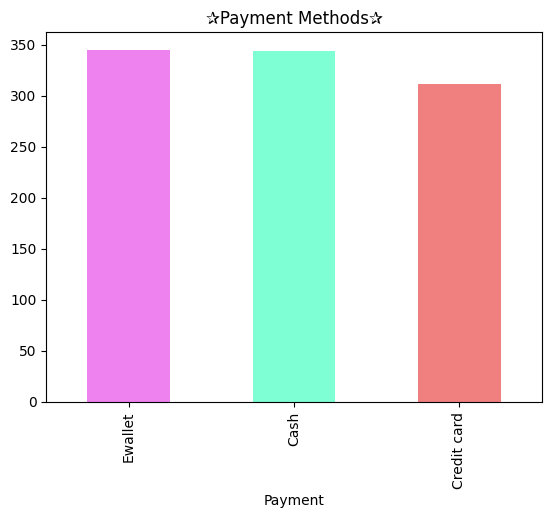

In [16]:
data['Payment'].value_counts().plot(kind="bar", color=["violet", "aquamarine", "lightcoral"])
plt.title('✰Payment Methods✰')

In [17]:
data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

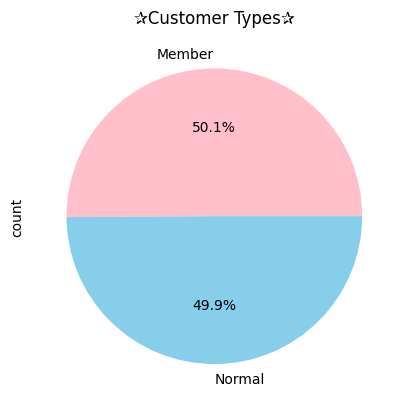

In [18]:
data['Customer type'].value_counts().plot(kind="pie", autopct='%1.1f%%', colors = ['pink', 'skyblue'])
plt.title("✰Customer Types✰")
plt.show()


## Product Performance ✨

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(Total_Value['Product line'], Total_Value['Total'], color = 'pink')
plt.xlabel('Product Line')
plt.ylabel('Total Value')
plt.title('✰Total Sales by Product Line✰')
plt.xticks(rotation=45)
plt.tight_layout()
total_values = Total_Value['Total']
for i, v in enumerate(total_values):
    plt.text(i, v + 500, '{:,.2f}'.format(v), ha='center', va='bottom', fontsize=9)

plt.show()

NameError: name 'Total_Value' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
average_by_category = data.groupby("Product line")["gross income"].apply(np.mean)
print(average_by_category)

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Sports and travel         15.812630
Name: gross income, dtype: float64


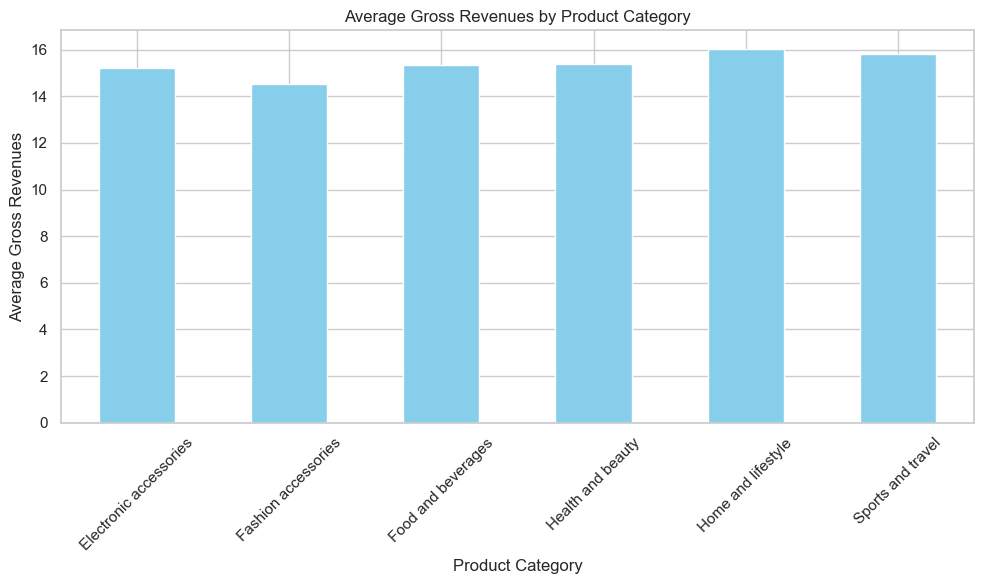

In [ ]:
plt.figure(figsize=(10, 6))
average_by_category.plot(kind="bar", color="skyblue")
plt.title("Average Gross Revenues by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Gross Revenues")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()